In [7]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.7 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [66 lines of output]
      /tmp/pip-install-zpsn2jz7/fbprophet_c74d9f5a49c64dab9d2373ec4061687e/setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      /tmp/pip-install-zpsn2jz7/fbprophet_c74d9f5a49c64dab9d2373ec4061687e/setup.py:19: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all s

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
#from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Make sure to adjust the file paths as needed
data_5_min = pd.read_csv('/home/harry/pi42/app/BTCINR_5m_data.csv')  # Data for ARIMA
data_15_min = pd.read_csv('/home/harry/pi42/app/BTCINR_15m_data.csv')  # Data for Random Forest
data_30_min = pd.read_csv('/home/harry/pi42/app/BTCINR_30m_data.csv')  # Data for Gradient Boosting
data_1_hour = pd.read_csv('/home/harry/pi42/app/BTCINR_1h_data.csv')  # Data for LSTM
data_6_hour = pd.read_csv('/home/harry/pi42/app/BTCINR_6h_data.csv')  # Data for Prophet
data_12_hour = pd.read_csv('/home/harry/pi42/app/BTCINR_12h_data.csv')  # Data for XGBoost

In [15]:
# Preprocessing Function
def preprocess_data(df, time_column='startTime', price_column='close'):
    df[time_column] = pd.to_datetime(df[time_column])  # Convert to datetime
    df.set_index(time_column, inplace=True)  # Set timestamp as index
    df.columns = df.columns.str.strip()  # Strip whitespace from columns
    return df

In [16]:
# Preprocess all datasets
data_5_min = preprocess_data(data_5_min)
data_15_min = preprocess_data(data_15_min)
data_30_min = preprocess_data(data_30_min)
data_1_hour = preprocess_data(data_1_hour)
data_6_hour = preprocess_data(data_6_hour)
data_12_hour = preprocess_data(data_12_hour)


In [19]:
print(data_5_min.columns)

Index(['open', 'high', 'low', 'close', 'endTime', 'volume'], dtype='object')


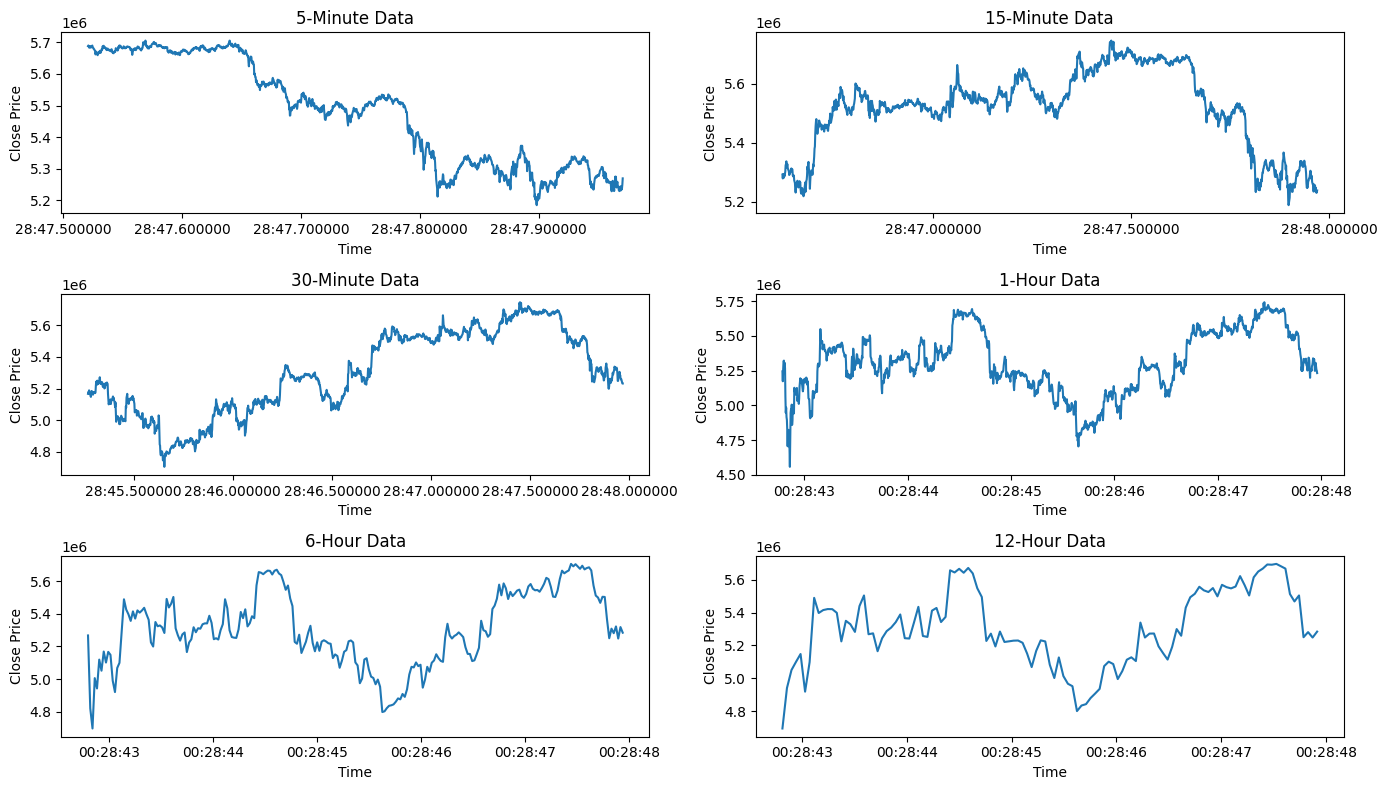

In [20]:
import matplotlib.pyplot as plt

# Plot the preprocessed data
plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 1)
plt.plot(data_5_min.index, data_5_min['close'])
plt.title('5-Minute Data')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.subplot(3, 2, 2)
plt.plot(data_15_min.index, data_15_min['close'])
plt.title('15-Minute Data')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.subplot(3, 2, 3)
plt.plot(data_30_min.index, data_30_min['close'])
plt.title('30-Minute Data')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.subplot(3, 2, 4)
plt.plot(data_1_hour.index, data_1_hour['close'])
plt.title('1-Hour Data')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.subplot(3, 2, 5)
plt.plot(data_6_hour.index, data_6_hour['close'])
plt.title('6-Hour Data')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.subplot(3, 2, 6)
plt.plot(data_12_hour.index, data_12_hour['close'])
plt.title('12-Hour Data')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()


In [21]:
def train_test_split_data(df, test_size=0.2):
    train_size = int(len(df) * (1 - test_size))
    train_data = df[:train_size]
    test_data = df[train_size:]
    return train_data, test_data

train_5_min, test_5_min = train_test_split_data(data_5_min)
train_15_min, test_15_min = train_test_split_data(data_15_min)
train_30_min, test_30_min = train_test_split_data(data_30_min)
train_1_hour, test_1_hour = train_test_split_data(data_1_hour)
train_6_hour, test_6_hour = train_test_split_data(data_6_hour)
train_12_hour, test_12_hour = train_test_split_data(data_12_hour)


In [29]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def evaluate_arima(train, test):
    model = ARIMA(train['close'], order=(5, 1, 0))
    model_fit = model.fit()
    
    # Forecast for test period plus additional future steps
    future_steps = 50  # Adjust as needed
    predictions = model_fit.forecast(steps=len(test) + future_steps)
    
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test['close'], label='Actual Prices', color='blue')
    plt.plot(pd.date_range(start=test.index[0], periods=len(predictions), freq=test.index.freq), 
             predictions, label='Predicted Prices', color='orange')
    
    # Plot predicted points
    plt.scatter(pd.date_range(start=test.index[0], periods=len(predictions), freq=test.index.freq),
                predictions, color='red', s=20, label='Predicted Points')
    
    plt.title('ARIMA Model Forecast')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    return predictions

In [ ]:
def evaluate_random_forest(train, test):
    train['lag_1'] = train['close'].shift(1)
    train.dropna(inplace=True)

    X_train = train[['lag_1']]
    y_train = train['close']

    X_test = test[['lag_1']]
    y_test = test['close']

    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(test['timestamp'], y_test, label='Actual Prices', color='blue')
    plt.plot(test['timestamp'], predictions, label='Predicted Prices', color='orange')
    plt.title('Random Forest Model Forecast')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return predictions


rf_predictions_15_min = evaluate_random_forest(train_15_min, test_15_min)

